In [1]:
import pandas as pd
import janitor
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/eddie/Downloads/energy_dataset.csv.txt')

In [3]:
df = janitor.clean_names(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation_biomass                           35045 non-null  float64
 2   generation_fossil_brown_coal_lignite         35046 non-null  float64
 3   generation_fossil_coal_derived_gas           35046 non-null  float64
 4   generation_fossil_gas                        35046 non-null  float64
 5   generation_fossil_hard_coal                  35046 non-null  float64
 6   generation_fossil_oil                        35045 non-null  float64
 7   generation_fossil_oil_shale                  35046 non-null  float64
 8   generation_fossil_peat                       35046 non-null  float64
 9   generation_geothermal                        35046 non-null  float64
 10

In [5]:
df.describe()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_coal_derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [6]:
df = df.dropna(axis = 1, how='all')

# Convert time to date time

df['time'] = pd.to_datetime(df['time'], utc= True)

# Set time as the index

df = df.set_index('time')

In [7]:
# Check for duplicates
df.duplicated().sum()

0

Good, no duplicates that could cause overfitting to our model.

In [8]:
# Function that plots time series of each column

def plot_series(df: pd.DataFrame(), column= None, label = None, ylabel= None, title= None, start = 0, end= None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 14))
    
    ax.set_xlabel('Time', fontsize=16)
    
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
        
    if title:
        ax.set_title(title, fontsize = 24)
    
    ax.grid(True)
    return ax

In [9]:
df.columns

Index(['generation_biomass', 'generation_fossil_brown_coal_lignite',
       'generation_fossil_coal_derived_gas', 'generation_fossil_gas',
       'generation_fossil_hard_coal', 'generation_fossil_oil',
       'generation_fossil_oil_shale', 'generation_fossil_peat',
       'generation_geothermal', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_marine',
       'generation_nuclear', 'generation_other', 'generation_other_renewable',
       'generation_solar', 'generation_waste', 'generation_wind_offshore',
       'generation_wind_onshore', 'forecast_solar_day_ahead',
       'forecast_wind_onshore_day_ahead', 'total_load_forecast',
       'total_load_actual', 'price_day_ahead', 'price_actual'],
      dtype='object')

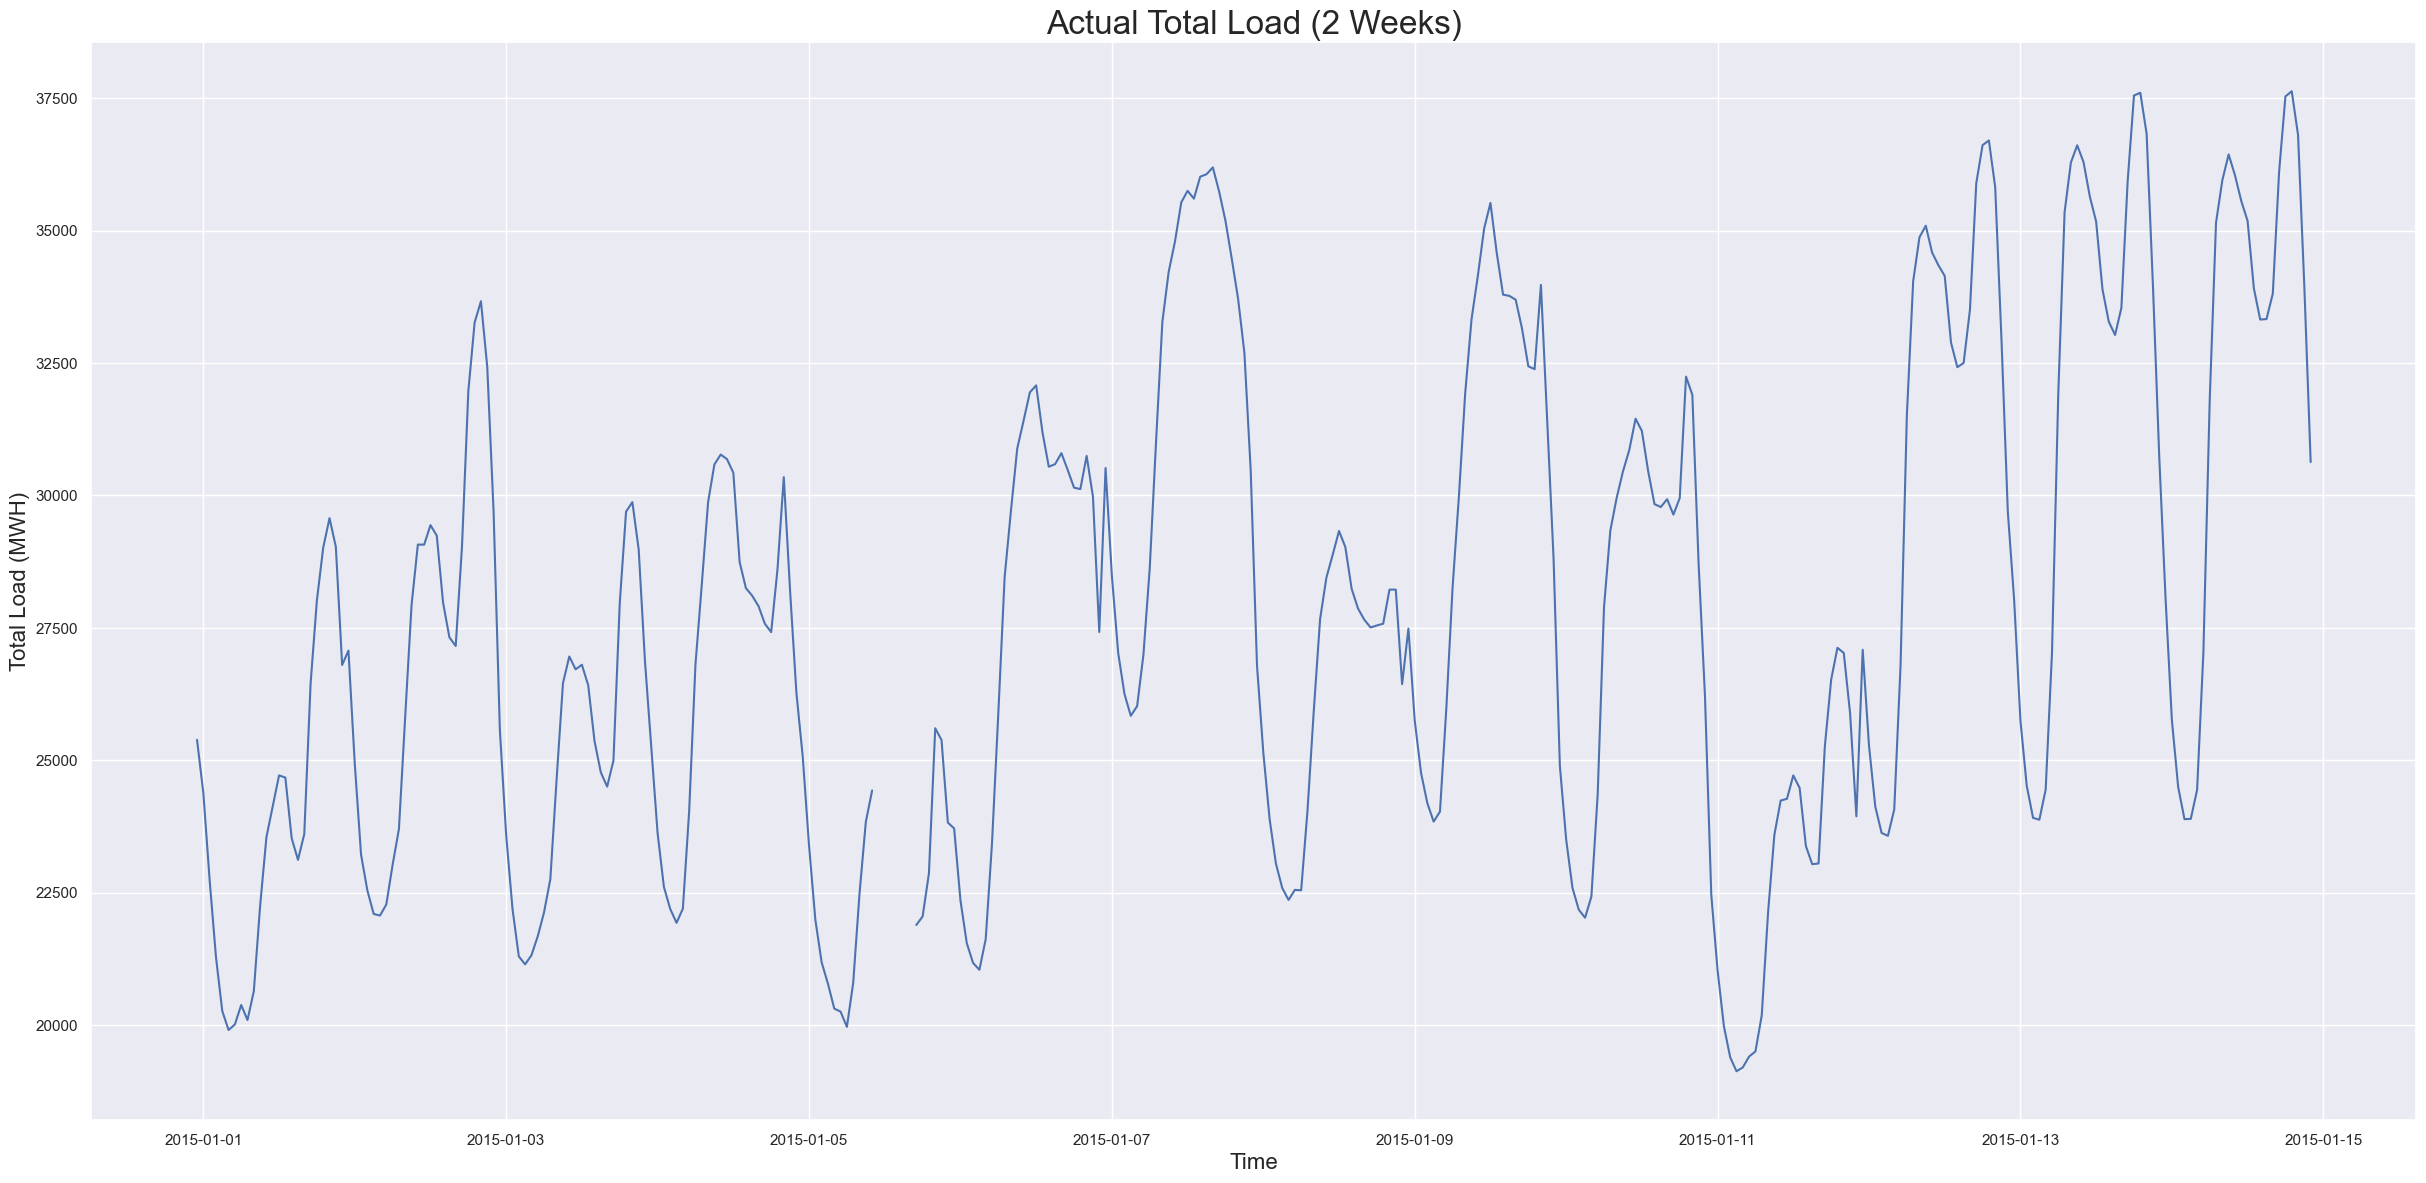

In [10]:
ax = plot_series(df, 'total_load_actual', ylabel='Total Load (MWH)', title='Actual Total Load (2 Weeks)', end=24*7*2)


plt.show()

#### Going to need to address the NAs for each column to connect the dots

In [11]:
# Use interpolation to address those values

df = df.interpolate(method='linear', limit_direction='forward', axis = 0)

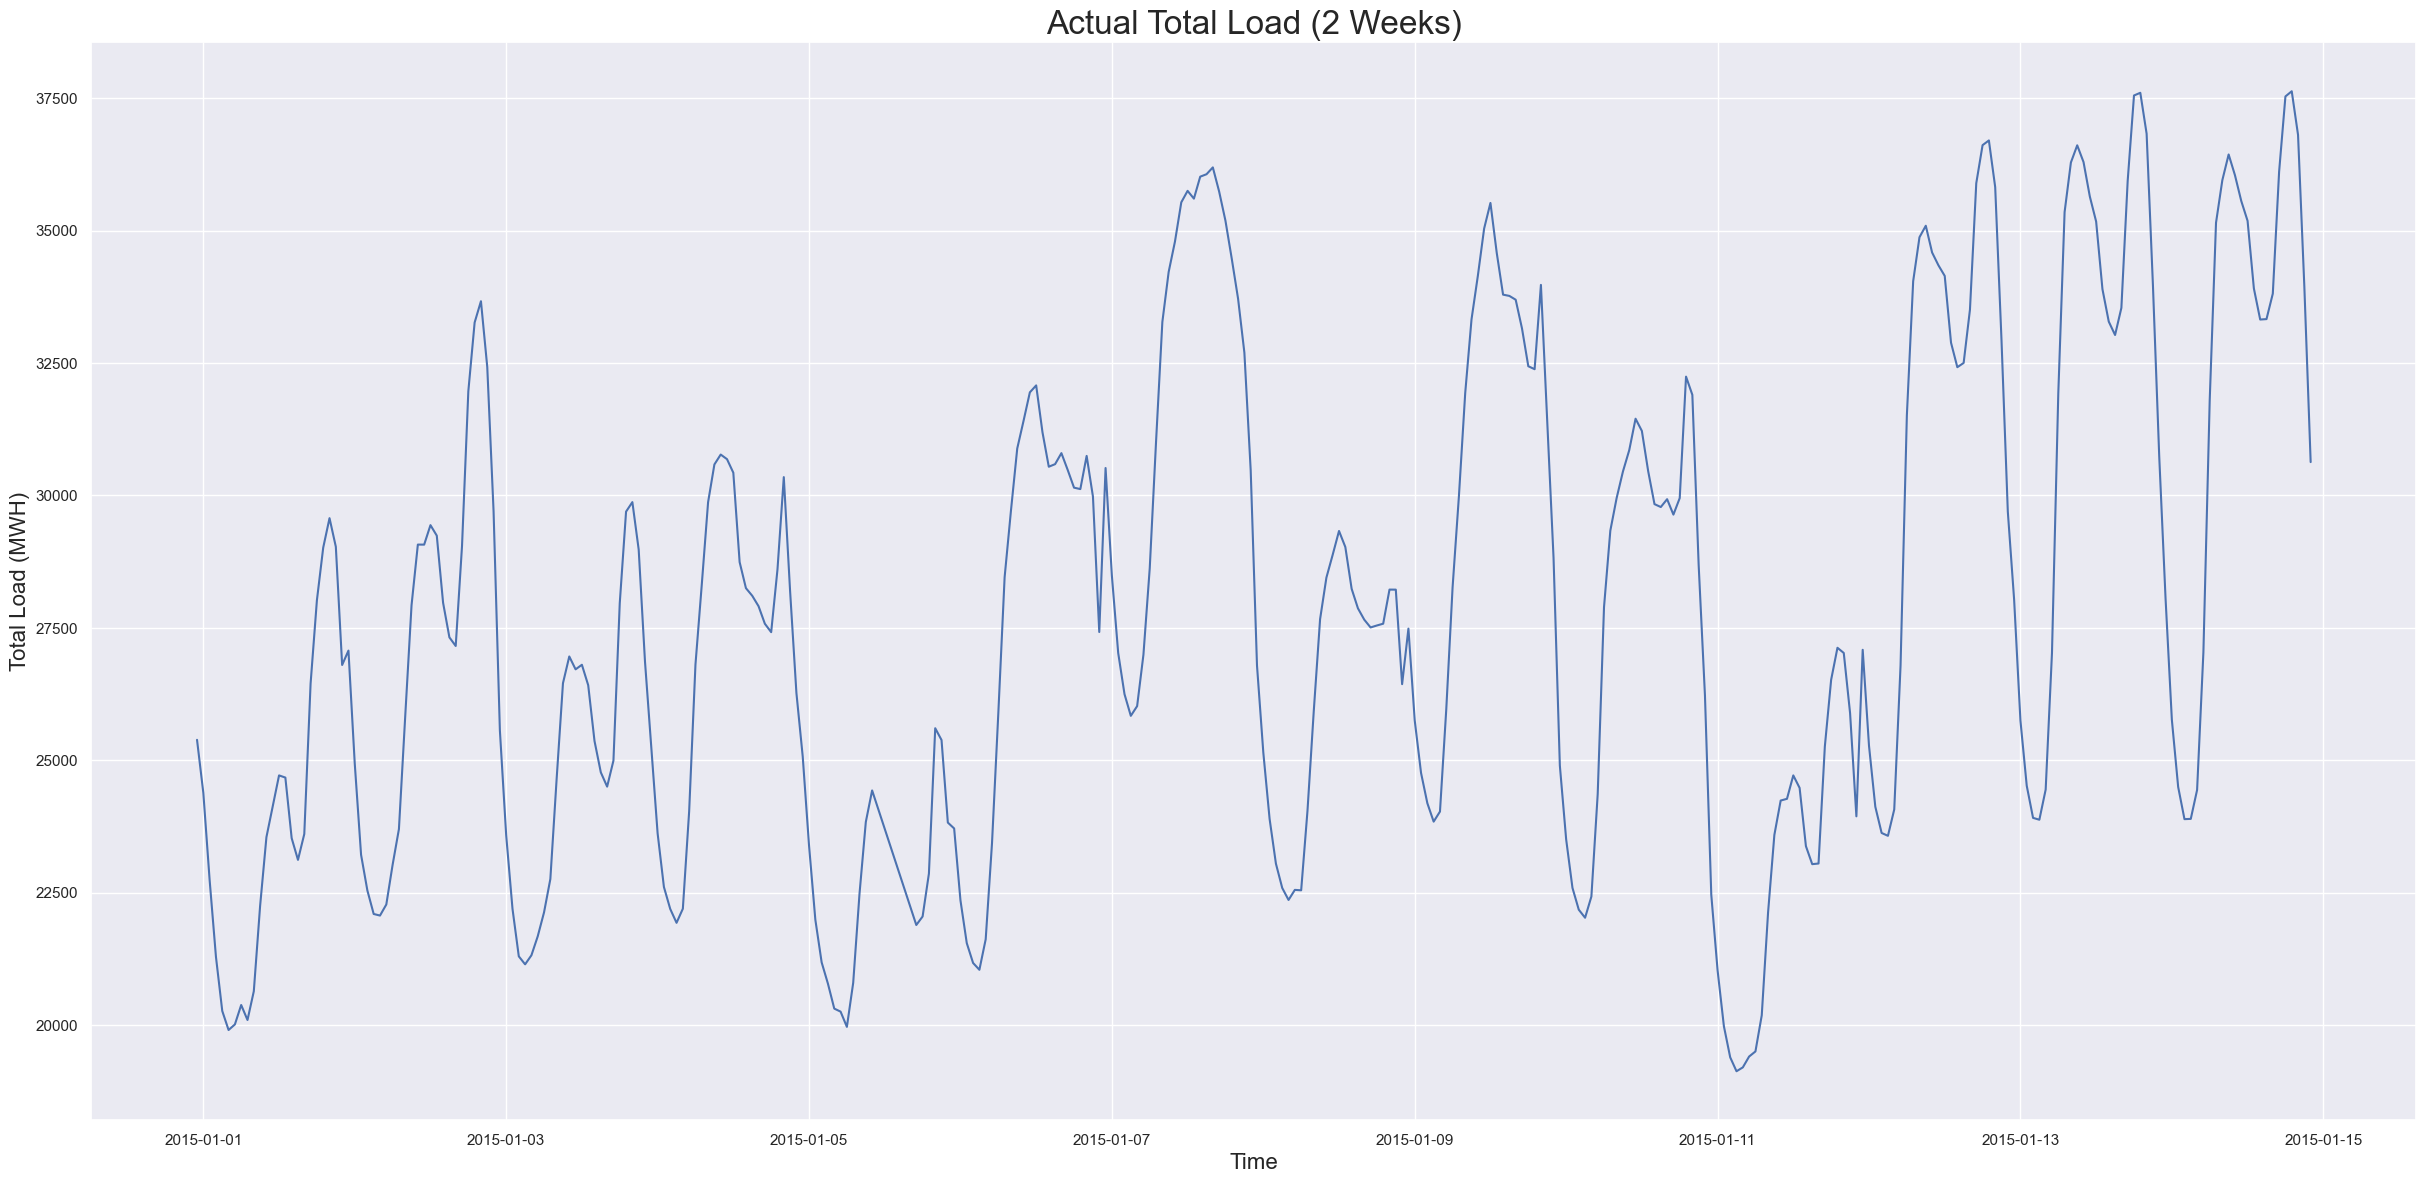

In [12]:
ax = plot_series(df, 'total_load_actual', ylabel='Total Load (MWH)', title='Actual Total Load (2 Weeks)', end=24*7*2)


plt.show()

#### This looks better

In [13]:
# Need to remove columns with all 0s

df = df.loc[:, (df != 0).any(axis=0)]

In [14]:
# First feature: business hours

for i in range(len(df)):
    position = df.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    
    df.loc[position, 'hour'] = hour
    df.loc[position, 'weekday'] = weekday
    df.loc[position, 'month'] = month

In [15]:
df.isna().sum()

generation_biomass                             0
generation_fossil_brown_coal_lignite           0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run_of_river_and_poundage     0
generation_hydro_water_reservoir               0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_onshore                        0
forecast_solar_day_ahead                       0
forecast_wind_onshore_day_ahead                0
total_load_forecast                            0
total_load_actual                              0
price_day_ahead                                0
price_actual                                   0
hour                

In [16]:
correlations = df.corr(method='pearson')

print(correlations['price_actual'].sort_values(ascending=False).to_string())

price_actual                                   1.000000
price_day_ahead                                0.732155
generation_fossil_hard_coal                    0.465637
generation_fossil_gas                          0.461452
total_load_forecast                            0.435864
total_load_actual                              0.435253
generation_fossil_brown_coal_lignite           0.363993
generation_fossil_oil                          0.285050
month                                          0.281219
generation_other_renewable                     0.255551
hour                                           0.237381
generation_waste                               0.168710
generation_biomass                             0.142671
forecast_solar_day_ahead                       0.101402
generation_other                               0.099914
generation_solar                               0.098529
generation_hydro_water_reservoir               0.071910
generation_nuclear                            -0

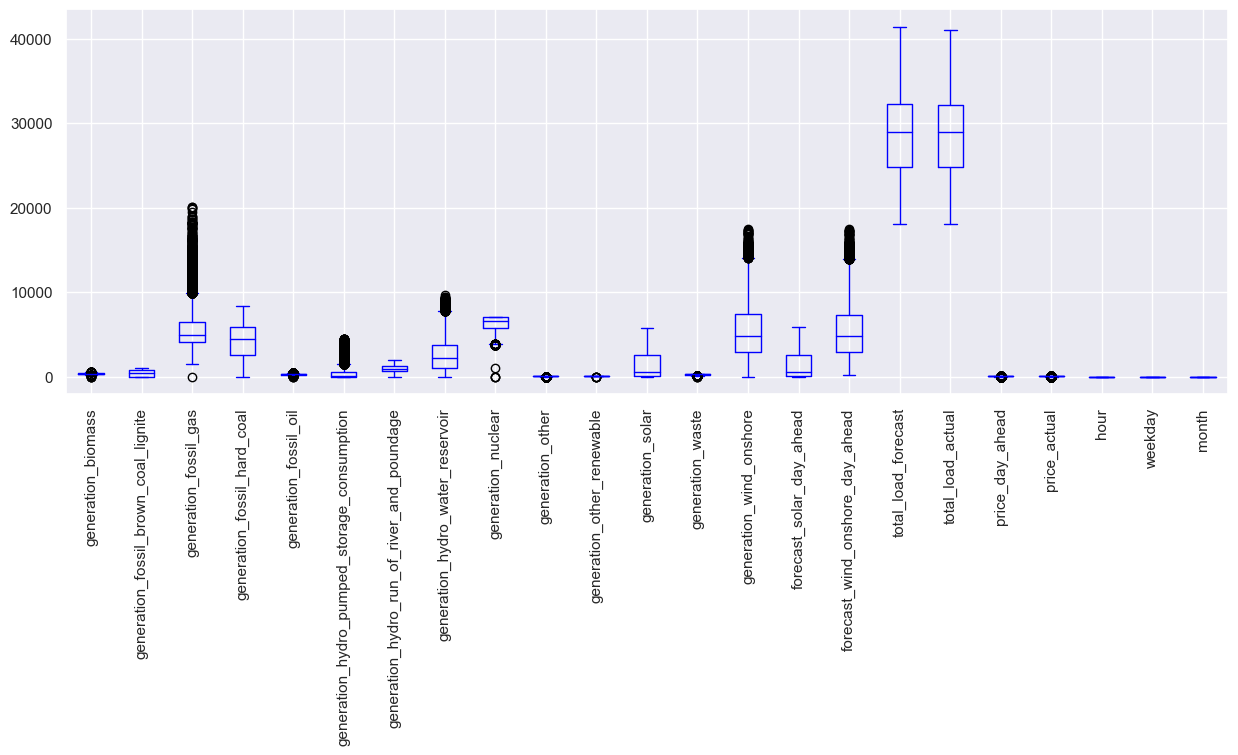

In [17]:
df.boxplot(rot='vertical', color='blue',figsize=(15, 5))

plt.show()

Text(0.5, 1.0, 'Hourly boxplots of total load')

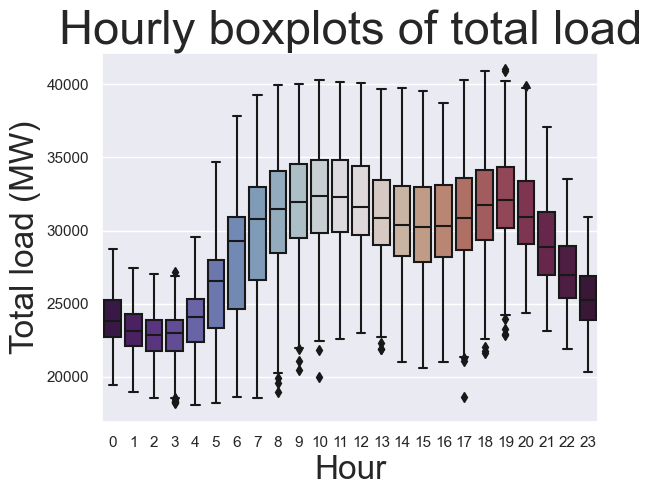

In [18]:
sns.boxplot(x=df.index.hour, y='total_load_actual', data=df, palette="twilight_shifted")
plt.ylabel('Total load (MW)', fontsize=24)
plt.xlabel('Hour', fontsize=24)
plt.title("Hourly boxplots of total load", fontsize=34)

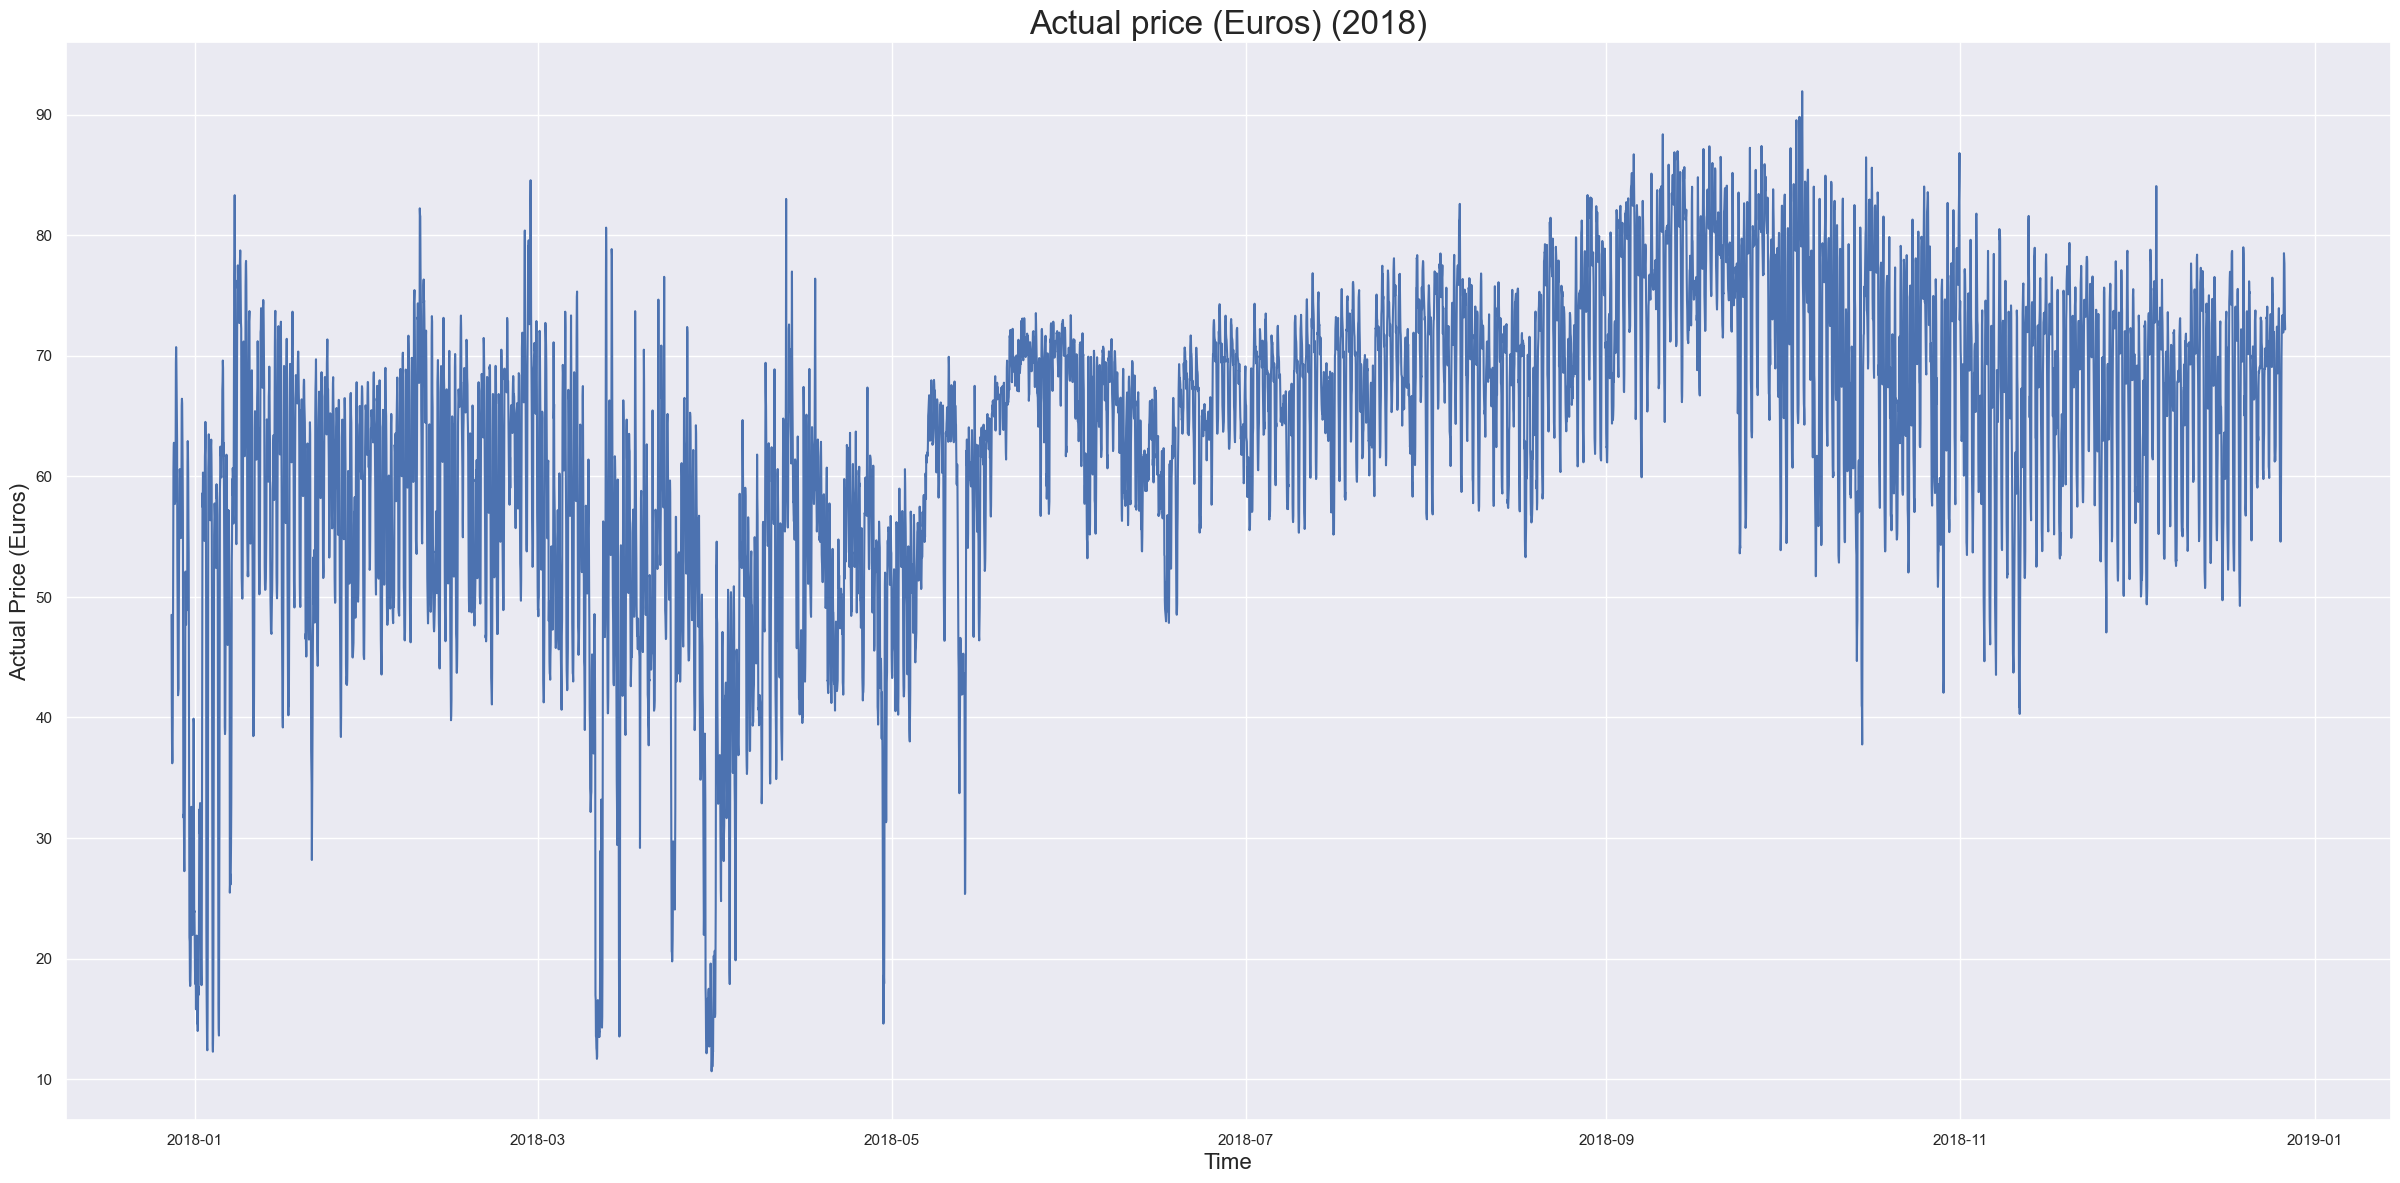

In [38]:
ax = plot_series(df, 'price_actual', ylabel='Actual Price (Euros)', title='Actual price (Euros) (2018)', start=24*7*156, end=24*7*208)


plt.show()